In [5]:
import numpy as np
import matplotlib.pyplot as plt
import re
import math
import os

In [6]:
patt_label = re.compile(r'"(.*)"')
plt.rcParams.update({
    "font.family": 'STIXGeneral',
    "font.size": 13,
    "mathtext.fontset":'stix',
    "axes.unicode_minus": False,
})

In [7]:
EDR_DIR = 'nvt.edr'
os.environ['GMX_MAXBACKUP'] = '-1'
energies = ['Potential', 'Temperature', 'Pressure', 'Density', 
            'Box-X', 'Volume', 'Enthalpy', 'Conserved-En.']

units = []
legends = []
data = []

for i, idx in enumerate(energies):
    os.system(f'echo {idx} | gmx energy -f {EDR_DIR}')
    data.append(np.loadtxt('energy.xvg', comments=['#', '@']).T)

    with open(r'energy.xvg') as f:
        for line in f.readlines():
            match line[0]:
                case '#': continue
                case '@':
                    if label := patt_label.search(line):
                        line_split = line.split()
                        if 'yaxis' in line_split:
                            units.append(label.group(1))
                        elif 'legend' in line_split:
                            legends.append(label.group(1))
                case _:
                    break



Statistics over 10000001 steps [ 0.0000 through 20000.0000 ps ], 1 data sets
All statistics are over 100001 points

Energy                      Average   Err.Est.       RMSD  Tot-Drift
-------------------------------------------------------------------------------
Potential                   3465.16        6.9    156.898   -22.2855  (kJ/mol)

Statistics over 10000001 steps [ 0.0000 through 20000.0000 ps ], 1 data sets
All statistics are over 100001 points

Energy                      Average   Err.Est.       RMSD  Tot-Drift
-------------------------------------------------------------------------------
Temperature                  347.87          2    26.2634    11.9041  (K)

Statistics over 10000001 steps [ 0.0000 through 20000.0000 ps ], 1 data sets
All statistics are over 100001 points

Energy                      Average   Err.Est.       RMSD  Tot-Drift
-------------------------------------------------------------------------------
Pressure                  -0.185902      0.099   

                       :-) GROMACS - gmx energy, 2023 (-:

Executable:   /usr/local/gromacs/bin/gmx
Data prefix:  /usr/local/gromacs
Working dir:  /media/crema/SanDisk SSD/gromacs/cyclodextrin
Command line:
  gmx energy -f nvt.edr

Opened nvt.edr as single precision energy file

Select the terms you want from the following list by
selecting either (part of) the name or the number or a combination.
End your selection with an empty line or a zero.
-------------------------------------------------------------------
  1  G96Bond          2  G96Angle         3  Proper-Dih.      4  Improper-Dih. 
  5  LJ-14            6  Coulomb-14       7  LJ-(SR)          8  Disper.-corr. 
  9  Coulomb-(SR)    10  Coul.-recip.    11  Potential       12  Kinetic-En.   
 13  Total-Energy    14  Conserved-En.   15  Temperature     16  Pres.-DC      
 17  Pressure        18  Constr.-rmsd    19  Vir-XX          20  Vir-XY        
 21  Vir-XZ          22  Vir-YX          23  Vir-YY          24  Vir-YZ        
 2

已读取数据：['Potential', 'Temperature', 'Pressure', 'Pressure', 'Pressure', 'Pressure', 'Pressure', 'Conserved En.']


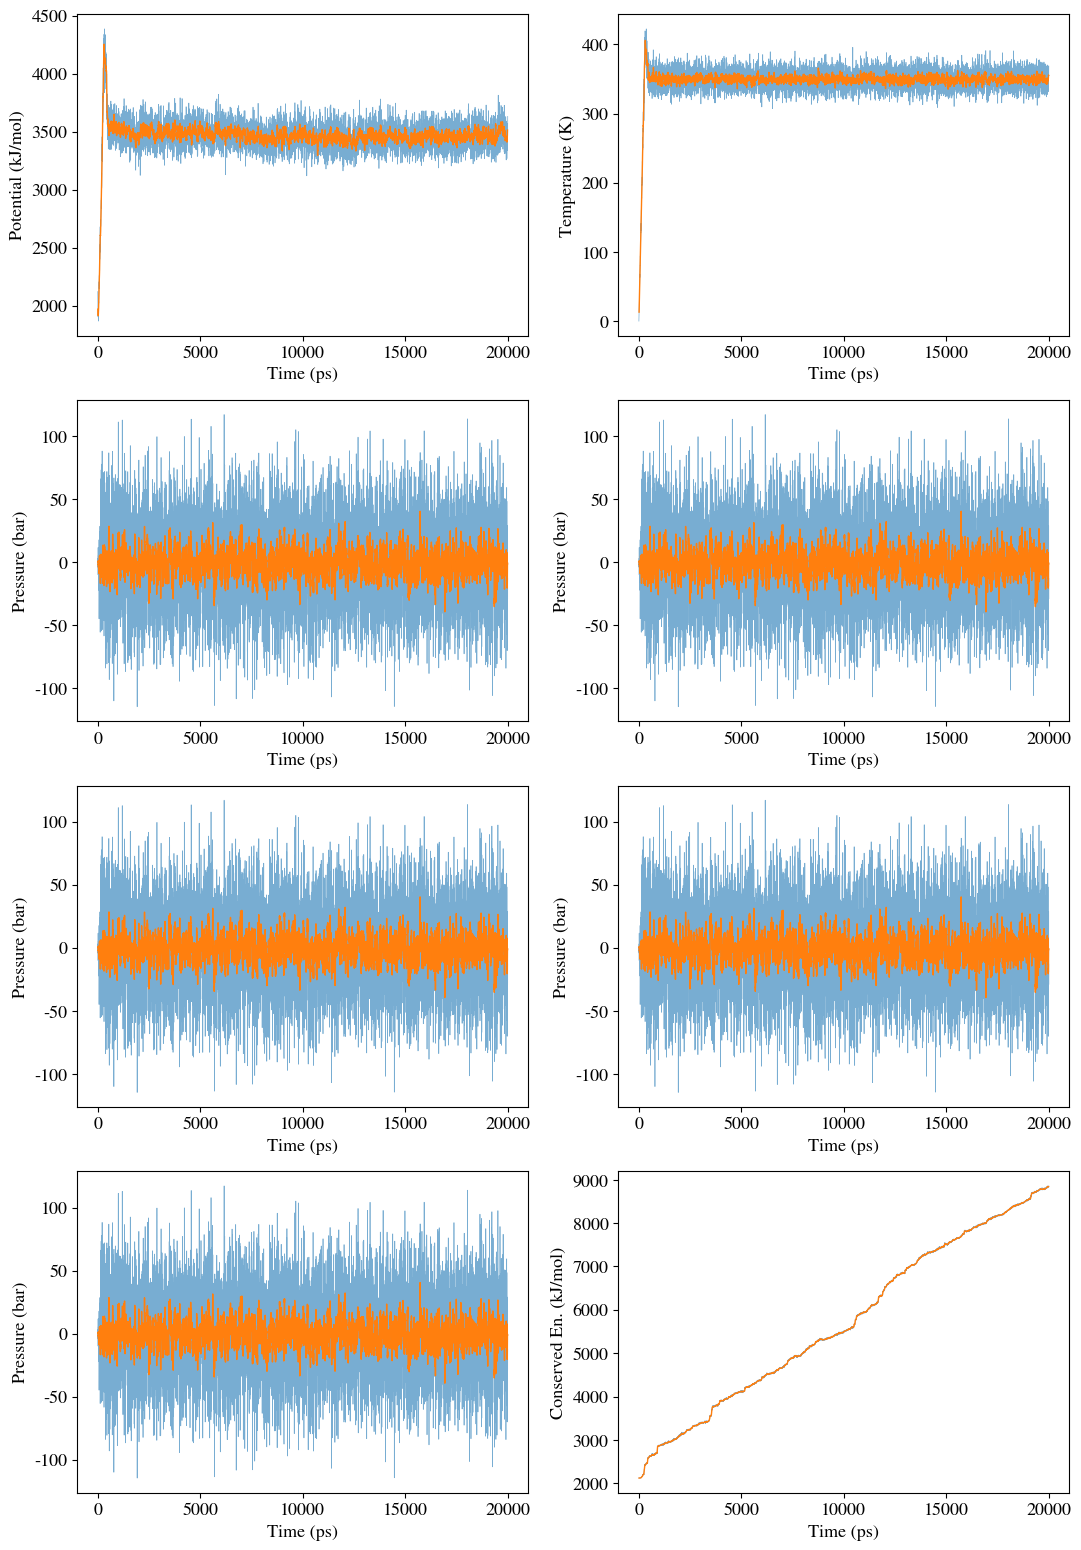

In [8]:
print(f'已读取数据：{legends}')

nplots = len(legends)
rows = math.ceil(nplots / 2)
fig, axes = plt.subplots(rows, 2, figsize=[12.8, 4.8 * rows], dpi=100, squeeze=False)
if nplots < 2 * rows:
    axes[rows - 1, 1].axis(False)

k = 11  # an odd number for calculating the moving mean

for idx, (legend, unit, series) in enumerate(zip(legends, units, data)):
    axis = axes[idx // 2, idx % 2]
    axis.plot(series[0], series[1], linewidth=0.5, alpha=0.6)
    movmean = np.convolve(series[1], np.ones(k), 'valid') / k
    axis.plot(np.split(series[0], [k // 2, -(k // 2)])[1], movmean, linewidth=1)
    
    axis.set_xlabel('Time (ps)')
    axis.set_ylabel(f"{legend} {unit}")
